In [1]:
import h5py
import numpy as np
import pandas as pd 
import os
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re

In [2]:
def convert_csv_to_txt(input_file,output_file):
   
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as space_delimited_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            space_delimited_file.write(' '.join(row) + '\n')

    print(f'CSV file "{input_file}" converted to space-delimited file "{output_file}"')


In [3]:
def read_file(file):
    hf = h5py.File(file, 'r')
    attributes = []
    for key in hf.keys():
        attributes.append(key)
    
    return attributes, hf

In [4]:
def get_data(hf,attributes):
    data = []
    pm = []
    acc_pm = []
    loss_pm = []
    loss_gm = []
    for i in range(len(attributes)):
        ai = hf.get(attributes[i])
        ai = np.array(ai)
        data.append(ai)
    
    return data

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def create_bar_graph(x_ticks, y_values, ylabel, figure_number, fig_path, client_id):
    # x_label = 'Client_' + str(client_id)
    plt.figure(figure_number)
    plt.bar(x_ticks, y_values, color='skyblue')
    plt.xlabel('Client '+ str(client_id), fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    # plt.title()
    plt.xticks(rotation=45, fontsize=20)  # Rotate x-ticks if necessary
    plt.yticks(fontsize=20)
    plt.tight_layout()
    
    plt.savefig(fig_path + ylabel +'.png', bbox_inches='tight', dpi=300)
    plt.show()


In [58]:
def performance_analysis(path, client_id):
    df_loss = pd.DataFrame()
    df_accuracy = pd.DataFrame()
    df_f1 = pd.DataFrame()
    col_accuracy_f1 = []
    
    dir_list = os.listdir(path)
    #print(dir_list)
    for file_name in dir_list:
    
        if file_name.endswith(".h5"):
            # Regular expression pattern to match 'client_frac_' followed by any number
            print(file_name)
            
             
            if file_name == '_exp_no_0_GR_50_BS_64_data_silo_100_num_user_8.0.h5':
                column_name = 8
            elif file_name == '_exp_no_0_GR_50_BS_64_data_silo_100_num_user_16.0.h5':
                column_name = 16
            elif file_name == '_exp_no_0_GR_50_BS_64_data_silo_100_num_user_24.0.h5':
                column_name = 24
            elif file_name == '_exp_no_0_GR_50_BS_64_data_silo_100_num_user_32.0.h5':
                column_name = 32
            else :
                column_name = 40
            
            attributes, hf = read_file(path+file_name)

            data = get_data(hf,attributes)
            #id=0
            for key in hf.keys():
                attributes.append(key)
               # print("id [",id,"] :", key)
            #id+=1
                
            val_acc = np.array(hf.get('client_' + str(client_id) + '_accuracy_array'))[:, 0]
            val_loss = np.array(hf.get('client_' + str(client_id) + '_val_loss_array'))[:, 0]
            f1_score = np.array(hf.get('client_' + str(client_id) + '_f1_array'))[:, 0]
            max_val_acc = val_acc.max()
            max_f1_score = f1_score.max()
            print(f"val_acc : {val_acc.max()}")
            print(f"f1_score : {f1_score.max()}")
            
            # df_loss[column_name] = val_loss
            df_accuracy[column_name] = val_acc
            df_f1[column_name] = f1_score
            col_accuracy_f1.append([ column_name, max_val_acc, max_f1_score])
    
            #print(f"df_loss : {df_loss}")  
    # print(f"df_accuracy : {df_accuracy}")  
    # print(f"df_f1 : {df_f1}")  

    col_accuracy_f1_sorted = sorted(col_accuracy_f1, key=lambda x: x[0])


    print(f"col_accuracy_f1 : {col_accuracy_f1_sorted}")  

    # Extracting x_ticks, accuracies, and F1 scores
    x_ticks = [str(item[0]) for item in col_accuracy_f1_sorted]  # Convert all to string for consistent axis labeling
    accuracies = [item[1] for item in col_accuracy_f1_sorted]
    f1_scores = [item[2] for item in col_accuracy_f1_sorted]
    
    
    create_bar_graph(x_ticks, accuracies, 'Accuracy', 1, path, client_id)

    create_bar_graph(x_ticks, f1_scores, 'F1-Score', 2, path, client_id)
    

_exp_no_0_GR_50_BS_124_data_silo_100_num_user_40.0.h5
val_acc : 0.30357142857142855
f1_score : 0.24892167011732227
_exp_no_0_GR_50_BS_64_data_silo_100_num_user_32.0.h5
val_acc : 0.2857142857142857
f1_score : 0.2080745341614907
_exp_no_0_GR_50_BS_64_data_silo_100_num_user_40.0.h5
val_acc : 0.32142857142857145
f1_score : 0.2757792080042719
_exp_no_0_GR_50_BS_64_data_silo_100_num_user_24.0.h5
val_acc : 0.30357142857142855
f1_score : 0.20817487734780965
_exp_no_0_GR_50_BS_64_data_silo_100_num_user_8.0.h5
val_acc : 0.25
f1_score : 0.1
_exp_no_0_GR_50_BS_64_data_silo_100_num_user_16.0.h5
val_acc : 0.25
f1_score : 0.11961451247165535
col_accuracy_f1 : [[8, 0.25, 0.1], [16, 0.25, 0.11961451247165535], [24, 0.30357142857142855, 0.20817487734780965], [32, 0.2857142857142857, 0.2080745341614907], [40, 0.30357142857142855, 0.24892167011732227], [40, 0.32142857142857145, 0.2757792080042719]]


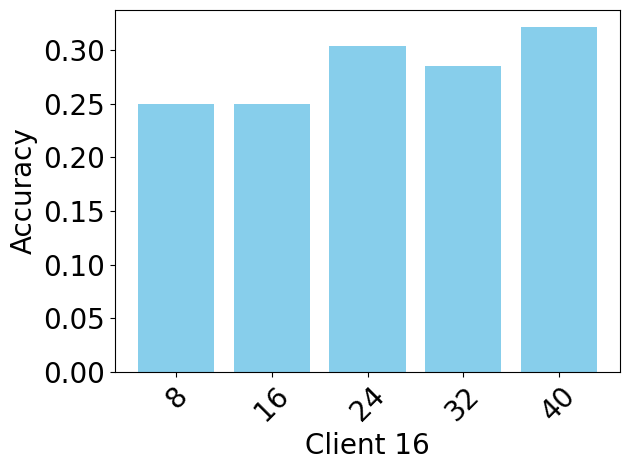

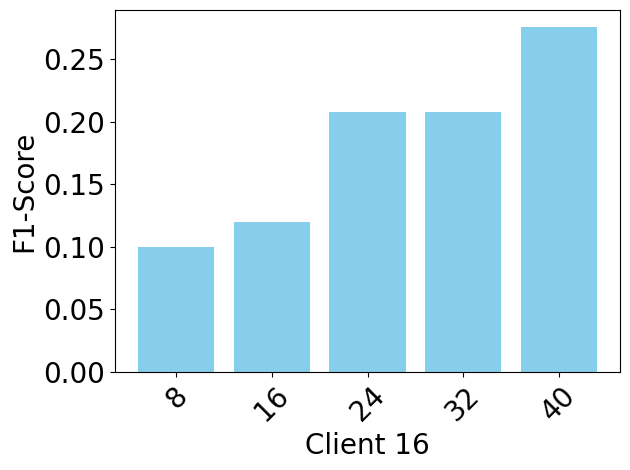

In [60]:
path = '/proj/sourasb-220503/FedMEM/results/fixed_client_16/target_10/'

performance_analysis(path, 16)